# EchoScope: Spotify Track Analysis & Recommendation System

## Clustering

### Set up the libraries and the dataset

In [1]:
import pandas as pd
from sklearn.decomposition import PCA # Dimensionality reduction.
from sklearn.cluster import KMeans # Clustering.
from sklearn.metrics import silhouette_score # Evaluation.
import matplotlib.pyplot as plt # Plotting.
import seaborn as sns # Plotting.

clean_tracks_df = pd.read_csv('dataset_clean.csv')

numeric_features = ["danceability", "energy", "loudness", "speechiness", "acousticness",
                    "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

X = clean_tracks_df[numeric_features]

### Understand the importance of each feature

In [2]:
pca = PCA(n_components=2) # 2D for visualization purposes.
X_pca = pca.fit_transform(X)

print("Explained Variance (2 Components):", sum(pca.explained_variance_ratio_))

Explained Variance (2 Components): 0.4397857615654085


Plot the explained variance.

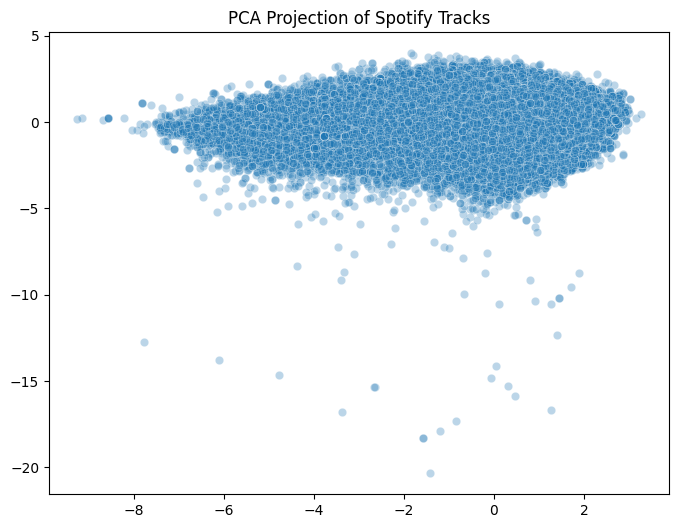

In [3]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.3)
plt.title("PCA Projection of Spotify Tracks")
plt.show()

### Apply K-means clustering.

Run the algorithm.

In [5]:
k = 5 # Choose the number of clusters.
kmeans = KMeans(n_clusters=k, random_state=26) # Fix a random seed for reproducibility.
clusters = kmeans.fit_predict(X)
clean_tracks_df['cluster'] = clusters # Add a new label specifying the cluster of each track.

Evaluate the clusters using the silhouette score. <br>
The silhouette score evaluates clustering by measuring how similar each point is to the other points in its cluster by computing the cohesion $a$, which is the average distance between the point and all other points in the cluster, and the separation $b$, which is the average distance between the point and all points in the nearest neighbouring cluster. <br>
From these values, it is possible to obtain the silhouette score $S = \frac{b - a}{\max\{a, b\}}$.

In [ ]:
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score}")

Visualize and analyze the clusters.

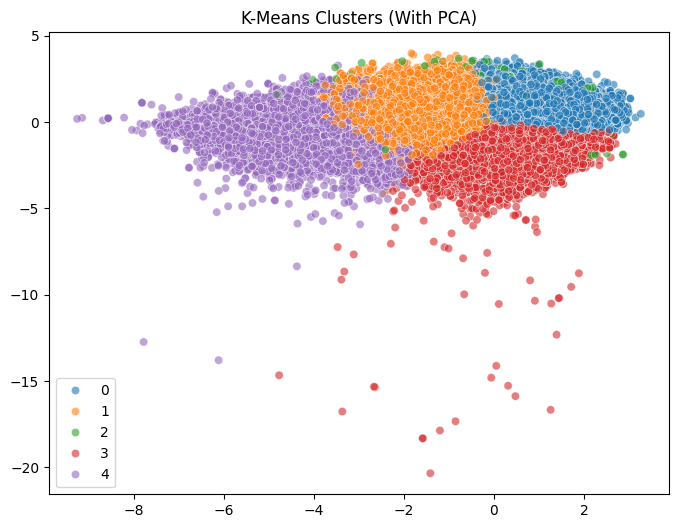

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="tab10", alpha=0.6)
plt.title("K-Means Clusters (With PCA)")
plt.show()

In [8]:
# Analyze the size of each cluster to check if the results are balanced.
print(clean_tracks_df['cluster'].value_counts())

# Compute the average feature values of each cluster to deduce its main features.
clean_tracks_df.groupby('cluster')[numeric_features].mean()

cluster
0    44840
3    33849
1    25678
4     8253
2     1380
Name: count, dtype: int64


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
0,0.695816,0.379230,0.388594,0.057566,-0.361133,-0.350958,-0.096862,0.811830,-0.048855,-0.164685
1,-0.168063,-1.000438,-0.445135,-0.288324,1.053027,-0.339432,-0.164144,-0.278076,-0.292288,-0.121959
2,0.087831,0.082684,-0.468583,6.379843,1.068150,-0.460432,1.993886,-0.055492,-0.584080,-0.136789
3,-0.509552,0.681607,0.437085,-0.041513,-0.737019,0.244186,0.227038,-0.593823,0.456459,0.330220
4,-1.182389,-1.757092,-2.440643,-0.312212,1.529975,2.038394,-0.227597,-1.100825,-0.599616,-0.057276


### Save the resulting data frame

In [9]:
clean_tracks_df.to_csv("../EchoScope/dataset_clustered.csv", index=False) # Can come in handy for the recommendation part.